In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from pandas import read_csv
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
dataset = read_csv('https://raw.githubusercontent.com/aldojuarez/ANN-UNISIERRA/master/alumnosUNISERRA.csv')

In [ ]:
dataset

,GENERO,EDAD,PROMEDIO,SUELDO,TRABAJA,HIJOS,BAJA
0,FEMENINO,22,83,3000,0,0,1
1,MASCULINO,17,85,4200,0,0,1
2,MASCULINO,22,70,1500,0,0,0
3,FEMENINO,22,81,800,0,0,0
4,MASCULINO,22,86,4000,0,0,0
...,...,...,...,...,...,...,...
1104,MASCULINO,22,86,4000,0,0,0
1105,MASCULINO,22,80,3000,0,0,0
1106,MASCULINO,23,94,1200,0,0,1
1107,MASCULINO,23,80,4000,0,0,1


In [ ]:
le=LabelEncoder()
dataset.GENERO=le.fit_transform(dataset.GENERO)

In [ ]:
dataset

,GENERO,EDAD,PROMEDIO,SUELDO,TRABAJA,HIJOS,BAJA
0,0,22,83,3000,0,0,1
1,1,17,85,4200,0,0,1
2,1,22,70,1500,0,0,0
3,0,22,81,800,0,0,0
4,1,22,86,4000,0,0,0
...,...,...,...,...,...,...,...
1104,1,22,86,4000,0,0,0
1105,1,22,80,3000,0,0,0
1106,1,23,94,1200,0,0,1
1107,1,23,80,4000,0,0,1


In [ ]:
y=dataset.iloc[:,-1].values
X=dataset.iloc[:,0:7].values

In [ ]:
X.shape

(1109, 7)

In [ ]:
y.shape

(1109,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
sc = StandardScaler(with_mean=False)

X_train_sc = sc.fit(X_train)
X_test_sc = sc.fit(X_test)

X_validation_sc = sc.fit(X_validation)
X_train = X_train_sc.transform(X_train)

X_test = X_test_sc.transform(X_test)
X_validation = X_validation_sc.transform(X_validation)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 7)]               0         
                                                                 
 dense_36 (Dense)            (None, 28)                224       
                                                                 
 dense_37 (Dense)            (None, 56)                1624      
                                                                 
 dense_38 (Dense)            (None, 28)                1596      
                                                                 
 dense_39 (Dense)            (None, 1)                 29        
                                                                 
Total params: 3,473
Trainable params: 3,473
Non-trainable params: 0
_________________________________________________________________
None


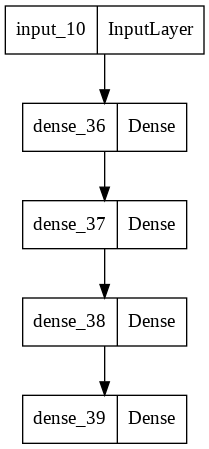

In [ ]:
visible = Input(shape=(7,))
hidden1 = Dense(28, activation='sigmoid')(visible)
hidden2 = Dense(56, activation='sigmoid')(hidden1)
hidden3 = Dense(28, activation='sigmoid')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
print(model.summary())
plot_model(model, to_file='mlp_graph.png')

In [ ]:
epochs = 10
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, verbose=False, validation_data=(X_validation, y_validation))

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype(int)
for i in range(20):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y_test[i]))
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.50)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test,y_pred)*100,'%')

[0, 22, 83, 3000, 0, 0, 1] => 0 (expected 0)
[1, 17, 85, 4200, 0, 0, 1] => 1 (expected 1)
[1, 22, 70, 1500, 0, 0, 0] => 1 (expected 1)
[0, 22, 81, 800, 0, 0, 0] => 0 (expected 0)
[1, 22, 86, 4000, 0, 0, 0] => 1 (expected 1)
[0, 21, 80, 6000, 0, 0, 0] => 0 (expected 0)
[1, 19, 79, 3000, 0, 0, 0] => 0 (expected 0)
[0, 18, 67, 5000, 0, 0, 1] => 1 (expected 1)
[0, 18, 81, 4000, 0, 0, 1] => 0 (expected 0)
[0, 19, 74, 5000, 0, 0, 0] => 0 (expected 0)
[0, 25, 81, 4000, 0, 0, 0] => 0 (expected 0)
[0, 22, 90, 3000, 0, 0, 0] => 1 (expected 1)
[0, 20, 85, 8000, 1, 0, 0] => 1 (expected 1)
[0, 20, 79, 4000, 0, 0, 0] => 0 (expected 0)
[0, 23, 77, 4000, 0, 0, 0] => 1 (expected 1)
[0, 22, 96, 5000, 0, 0, 0] => 0 (expected 0)
[1, 18, 92, 3000, 0, 0, 0] => 0 (expected 0)
[1, 19, 81, 9200, 0, 0, 1] => 0 (expected 0)
[0, 18, 89, 7000, 1, 0, 0] => 1 (expected 1)
[1, 19, 71, 3000, 0, 0, 1] => 0 (expected 0)
97.48201438848922 %


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.50)
print(accuracy_score(y_test,y_pred)*100,'%')

97.48201438848922 %


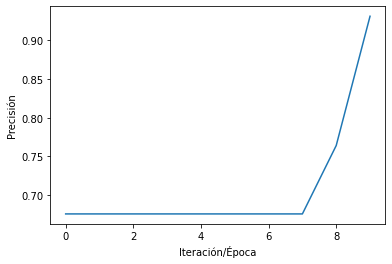

In [ ]:
plt.xlabel("Iteración/Época")
plt.ylabel("Precisión")
plt.plot(history.history["accuracy"])

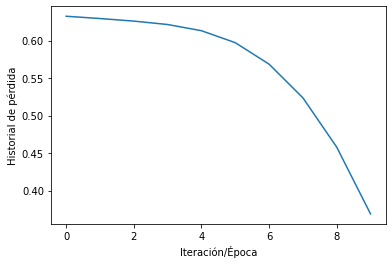

In [ ]:
plt.xlabel("Iteración/Época")
plt.ylabel("Historial de pérdida")
plt.plot(history.history["loss"])

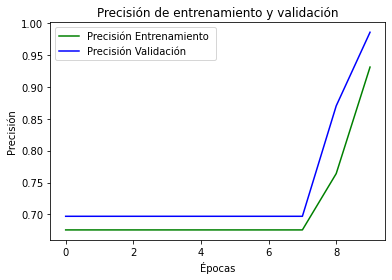

In [ ]:
epochsRange = range(0,epochs)
loss_train = history.history["accuracy"]
loss_val = history.history['val_accuracy']
plt.plot(epochsRange, loss_train, 'g', label='Precisión Entrenamiento ')
plt.plot(epochsRange, loss_val, 'b', label='Precisión Validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

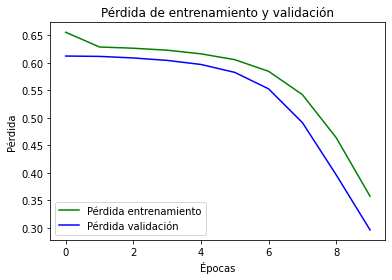

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(epochsRange, loss_train, 'g', label='Pérdida entrenamiento')
plt.plot(epochsRange, loss_val, 'b', label='Pérdida validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


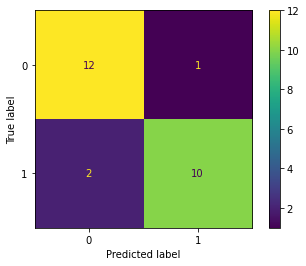

In [ ]:
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()